In [100]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

### Read in the data

- timestamp - A timestamp for the minute covered by the row.
- Asset_ID - An ID code for the cryptoasset.
- Count - The number of trades that took place this minute.
- Open - The USD price at the beginning of the minute.
- High - The highest USD price during the minute.
- Low - The lowest USD price during the minute.
- Close - The USD price at the end of the minute.
- Volume - The number of cryptoasset units traded during the minute.
- VWAP - The volume weighted average price for the minute.
- Target - 15 minute residualized returns. 

In [7]:
crypto_df = pd.read_csv('Resources/train.csv')
crypto_df.head(20)

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
0,1514764860,2,40.0,2376.580000,2399.5000,2357.1400,2374.590000,19.233005,2373.116392,-0.004218
1,1514764860,0,5.0,8.530000,8.5300,8.5300,8.530000,78.380000,8.530000,-0.014399
2,1514764860,1,229.0,13835.194000,14013.8000,13666.1100,13850.176000,31.550062,13827.062093,-0.014643
3,1514764860,5,32.0,7.659600,7.6596,7.6567,7.657600,6626.713370,7.657713,-0.013922
4,1514764860,7,5.0,25.920000,25.9200,25.8740,25.877000,121.087310,25.891363,-0.008264
5,1514764860,6,173.0,738.302500,746.0000,732.5100,738.507500,335.987856,738.839291,-0.004809
6,1514764860,9,167.0,225.330000,227.7800,222.9800,225.206667,411.896642,225.197944,-0.009791
7,1514764860,11,7.0,329.090000,329.8800,329.0900,329.460000,6.635710,329.454118,NaN
8,1514764920,2,53.0,2374.553333,2400.9000,2354.2000,2372.286667,24.050259,2371.434498,-0.004079
9,1514764920,0,7.0,8.530000,8.5300,8.5145,8.514500,71.390000,8.520215,-0.015875


In [8]:
asset_df = pd.read_csv('Resources/asset_details.csv')
asset_df

,Asset_ID,Weight,Asset_Name
0,2,2.397895,Bitcoin Cash
1,0,4.304065,Binance Coin
2,1,6.779922,Bitcoin
3,5,1.386294,EOS.IO
4,7,2.079442,Ethereum Classic
5,6,5.894403,Ethereum
6,9,2.397895,Litecoin
7,11,1.609438,Monero
8,13,1.791759,TRON
9,12,2.079442,Stellar


### Clean the dataset

In [9]:
# check the datatypes and counts of each column
crypto_df.info(show_counts =True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24236806 entries, 0 to 24236805
Data columns (total 10 columns):
 #   Column     Non-Null Count     Dtype  
---  ------     --------------     -----  
 0   timestamp  24236806 non-null  int64  
 1   Asset_ID   24236806 non-null  int64  
 2   Count      24236806 non-null  float64
 3   Open       24236806 non-null  float64
 4   High       24236806 non-null  float64
 5   Low        24236806 non-null  float64
 6   Close      24236806 non-null  float64
 7   Volume     24236806 non-null  float64
 8   VWAP       24236797 non-null  float64
 9   Target     23486468 non-null  float64
dtypes: float64(8), int64(2)
memory usage: 1.8 GB


In [118]:
# double check the missing values in each column 
crypto_df.isnull().sum()

timestamp         0
Asset_ID          0
Count             0
Open              0
High              0
Low               0
Close             0
Volume            0
VWAP              9
Target       750338
dtype: int64

In [121]:
# replace NaN Values with Zeros in Target column
crypto_df["Target"] = crypto_df["Target"].fillna(0)
crypto_df.head(10)

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
0,1514764860,2,40.0,2376.580000,2399.5000,2357.1400,2374.590000,19.233005,2373.116392,-0.004218
1,1514764860,0,5.0,8.530000,8.5300,8.5300,8.530000,78.380000,8.530000,-0.014399
2,1514764860,1,229.0,13835.194000,14013.8000,13666.1100,13850.176000,31.550062,13827.062093,-0.014643
3,1514764860,5,32.0,7.659600,7.6596,7.6567,7.657600,6626.713370,7.657713,-0.013922
4,1514764860,7,5.0,25.920000,25.9200,25.8740,25.877000,121.087310,25.891363,-0.008264
5,1514764860,6,173.0,738.302500,746.0000,732.5100,738.507500,335.987856,738.839291,-0.004809
6,1514764860,9,167.0,225.330000,227.7800,222.9800,225.206667,411.896642,225.197944,-0.009791
7,1514764860,11,7.0,329.090000,329.8800,329.0900,329.460000,6.635710,329.454118,0.000000
8,1514764920,2,53.0,2374.553333,2400.9000,2354.2000,2372.286667,24.050259,2371.434498,-0.004079
9,1514764920,0,7.0,8.530000,8.5300,8.5145,8.514500,71.390000,8.520215,-0.015875


In [122]:
# show all Rows with NaN Values in VWAP column
# from the output below we can see that all the nan values come from Asset_ID 10
crypto_df[crypto_df["VWAP"].isnull()]

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
15004269,1592173560,10,2.0,501.00,501.00,501.00,501.00,0.0,NaN,0.000000
15004283,1592173620,10,4.0,501.00,501.00,501.00,501.00,0.0,NaN,0.000000
15059232,1592426160,10,2.0,529.77,529.77,529.77,529.77,0.0,NaN,0.007356
15143187,1592823720,10,2.0,503.60,503.60,503.60,503.60,0.0,NaN,-0.005672
15183088,1593008940,10,2.0,484.16,484.16,484.16,484.16,0.0,NaN,-0.004281
15184216,1593013920,10,2.0,480.00,480.00,480.00,480.00,0.0,NaN,0.000000
15184243,1593014040,10,2.0,480.00,480.00,480.00,480.00,0.0,NaN,0.000000
15184309,1593014340,10,6.0,479.07,479.07,479.07,479.07,0.0,NaN,0.000000
15184778,1593016440,10,4.0,478.00,478.00,475.00,478.00,0.0,NaN,0.000000


In [11]:
# when I clean the data, I found a lot of gaps in data, which influence the consecutive of data visualisation 
# to fill the gaps, we can use the .reindex() method for forward filling, filling gaps with the previous valid value
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reindex.html

In [123]:
# I may code these following steps with function define later to fill gaps for each cryptocurrencies
# fill gaps for Bitcoin Cash
bit_cash = crypto_df[crypto_df["Asset_ID"]==2].set_index("timestamp")
bit_cash = bit_cash.reindex(range(bit_cash.index[0],bit_cash.index[-1]+60,60),method='pad')
(bit_cash.index[1:]-bit_cash.index[:-1]).value_counts()

60    1956959
Name: timestamp, dtype: int64

In [124]:
# fill gaps for Binance Coin
bin_coin = crypto_df[crypto_df["Asset_ID"]==0].set_index("timestamp")
bin_coin = bin_coin.reindex(range(bin_coin.index[0],bin_coin.index[-1]+60,60),method='pad')
(bin_coin.index[1:]-bin_coin.index[:-1]).value_counts()

60    1956959
Name: timestamp, dtype: int64

In [125]:
# fill gaps for Bitcoin 
bit = crypto_df[crypto_df["Asset_ID"]==1].set_index("timestamp")
bit = bit.reindex(range(bit.index[0],bit.index[-1]+60,60),method='pad')
(bit.index[1:]-bit.index[:-1]).value_counts()

60    1956959
Name: timestamp, dtype: int64

In [126]:
# fill gaps for EOS.IO
eos = crypto_df[crypto_df["Asset_ID"]==5].set_index("timestamp")
eos = eos.reindex(range(eos.index[0],eos.index[-1]+60,60),method='pad')
(eos.index[1:]-eos.index[:-1]).value_counts()

60    1956959
Name: timestamp, dtype: int64

In [127]:
# fill gaps for Ethereum Classic
eth_classic = crypto_df[crypto_df["Asset_ID"]==7].set_index("timestamp")
eth_classic = eth_classic.reindex(range(eth_classic.index[0],eth_classic.index[-1]+60,60),method='pad')
(eth_classic.index[1:]-eth_classic.index[:-1]).value_counts()

60    1956959
Name: timestamp, dtype: int64

In [128]:
# fill gaps for Ethereum
eth = crypto_df[crypto_df["Asset_ID"]==6].set_index("timestamp")
eth = eth.reindex(range(eth.index[0],eth.index[-1]+60,60),method='pad')
(eth.index[1:]-eth.index[:-1]).value_counts()

60    1956959
Name: timestamp, dtype: int64

In [129]:
# fill gaps for Litecoin
lite = crypto_df[crypto_df["Asset_ID"]==9].set_index("timestamp")
lite = lite.reindex(range(lite.index[0],lite.index[-1]+60,60),method='pad')
(lite.index[1:]-lite.index[:-1]).value_counts()

60    1956959
Name: timestamp, dtype: int64

In [130]:
# fill gaps for Monero
mon = crypto_df[crypto_df["Asset_ID"]==11].set_index("timestamp")
mon = mon.reindex(range(mon.index[0],mon.index[-1]+60,60),method='pad')
(mon.index[1:]-mon.index[:-1]).value_counts()

60    1956959
Name: timestamp, dtype: int64

In [22]:
### We find that the start dates of these 6 cryptocurrencies are not from the 2018-01-01, so we are not going to 
### include these in our project.
'''
tro = crypto_df[crypto_df["Asset_ID"]==13].set_index("timestamp")
tro = tro.reindex(range(tro.index[0],tro.index[-1]+60,60),method='pad')
(tro.index[1:]-tro.index[:-1]).value_counts()

ste = crypto_df[crypto_df["Asset_ID"]==12].set_index("timestamp")
ste = ste.reindex(range(ste.index[0],ste.index[-1]+60,60),method='pad')
(ste.index[1:]-ste.index[:-1]).value_counts()

car = crypto_df[crypto_df["Asset_ID"]==3].set_index("timestamp")
car = car.reindex(range(car.index[0],car.index[-1]+60,60),method='pad')
(car.index[1:]-car.index[:-1]).value_counts()

iota = crypto_df[crypto_df["Asset_ID"]==8].set_index("timestamp")
iota = iota.reindex(range(iota.index[0],iota.index[-1]+60,60),method='pad')
(iota.index[1:]-iota.index[:-1]).value_counts()

mak = crypto_df[crypto_df["Asset_ID"]==10].set_index("timestamp")
mak = mak.reindex(range(mak.index[0],mak.index[-1]+60,60),method='pad')
(mak.index[1:]-mak.index[:-1]).value_counts()

dog = crypto_df[crypto_df["Asset_ID"]==4].set_index("timestamp")
dog = dog.reindex(range(dog.index[0],dog.index[-1]+60,60),method='pad')
(dog.index[1:]-dog.index[:-1]).value_counts()
'''

60    1903823
Name: timestamp, dtype: int64

In [131]:
# check again to see if there still any missing data left

#frames = [bit_cash, bin_coin, bit, eos, eth_classic, eth, lite, mon]
bit_cash.isnull().sum()

Asset_ID    0
Count       0
Open        0
High        0
Low         0
Close       0
Volume      0
VWAP        0
Target      0
dtype: int64

In [132]:
bin_coin.isnull().sum()

Asset_ID    0
Count       0
Open        0
High        0
Low         0
Close       0
Volume      0
VWAP        0
Target      0
dtype: int64

In [133]:
bit.isnull().sum()

Asset_ID    0
Count       0
Open        0
High        0
Low         0
Close       0
Volume      0
VWAP        0
Target      0
dtype: int64

In [134]:
eos.isnull().sum()

Asset_ID    0
Count       0
Open        0
High        0
Low         0
Close       0
Volume      0
VWAP        0
Target      0
dtype: int64

In [135]:
eth_classic.isnull().sum()

Asset_ID    0
Count       0
Open        0
High        0
Low         0
Close       0
Volume      0
VWAP        0
Target      0
dtype: int64

In [136]:
eth.isnull().sum()

Asset_ID    0
Count       0
Open        0
High        0
Low         0
Close       0
Volume      0
VWAP        0
Target      0
dtype: int64

In [137]:
lite.isnull().sum()

Asset_ID    0
Count       0
Open        0
High        0
Low         0
Close       0
Volume      0
VWAP        0
Target      0
dtype: int64

In [138]:
mon.isnull().sum()

Asset_ID    0
Count       0
Open        0
High        0
Low         0
Close       0
Volume      0
VWAP        0
Target      0
dtype: int64

### Split training and testing data for each cryptocurrency

In [139]:
bit_cash.head()

,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
timestamp,,,,,,,,,
1514764860,2,40.0,2376.580000,2399.5,2357.14,2374.590000,19.233005,2373.116392,-0.004218
1514764920,2,53.0,2374.553333,2400.9,2354.20,2372.286667,24.050259,2371.434498,-0.004079
1514764980,2,61.0,2371.633333,2401.9,2353.70,2372.063333,42.676438,2375.442755,-0.002892
1514765040,2,95.0,2376.060000,2406.4,2344.00,2370.566667,37.820918,2371.096152,-0.003718
1514765100,2,33.0,2372.656667,2404.6,2343.40,2370.173333,8.519679,2370.345730,-0.002171


In [140]:
bit_cash_train = bit_cash[:1578240] # Start from 2018-01-01 00:01:00 to 2021-01-01 00:00:00
bit_cash_test = bit_cash[1578240:] # Start from 2021-01-01 00:01:00 to 2021-09-21 00:00:00

In [141]:
print(len(bit_cash_train)) 
print(len(bit_cash_test))

1578240
378720


In [142]:
# Split training and testing data for Bitcoin Cash
X_bit_cash_train = bit_cash_train.drop(columns=["Target"])
X_bit_cash_test = bit_cash_test.drop(columns=["Target"])
y_bit_cash_train = bit_cash_train.Target
y_bit_cash_test = bit_cash_test.Target

In [143]:
print(X_bit_cash_train.shape)
print(X_bit_cash_test.shape)

(1578240, 8)
(378720, 8)


In [144]:
# Split training and testing data for Binance Coin
bin_coin_train = bin_coin[:1578240] # Start from 2018-01-01 00:01:00 to 2021-01-01 00:00:00
bin_coin_test = bin_coin[1578240:] # Start from 2021-01-01 00:01:00 to 2021-09-21 00:00:00
X_bin_coin_train = bin_coin_train.drop(columns=["Target"])
X_bin_coin_test = bin_coin_test.drop(columns=["Target"])
y_bin_coin_train = bin_coin_train.Target
y_bin_coin_test = bin_coin_test.Target

In [146]:
# Split training and testing data for Bitcoin
bit_train = bit[:1578240] # Start from 2018-01-01 00:01:00 to 2021-01-01 00:00:00
bit_test = bit[1578240:] # Start from 2021-01-01 00:01:00 to 2021-09-21 00:00:00
X_bit_train = bit_train.drop(columns=["Target"])
X_bit_test = bit_test.drop(columns=["Target"])
y_bit_train = bit_train.Target
y_bit_test = bit_test.Target

In [147]:
# Split training and testing data for EOS.IO
eos_train = eos[:1578240] # Start from 2018-01-01 00:01:00 to 2021-01-01 00:00:00
eos_test = eos[1578240:] # Start from 2021-01-01 00:01:00 to 2021-09-21 00:00:00
X_eos_train = eos_train.drop(columns=["Target"])
X_eos_test = eos_test.drop(columns=["Target"])
y_eos_train = eos_train.Target
y_eos_test = eos_test.Target

In [148]:
# Split training and testing data for Ethereum Classic
eth_classic_train = eth_classic[:1578240] # Start from 2018-01-01 00:01:00 to 2021-01-01 00:00:00
eth_classic_test = eth_classic[1578240:] # Start from 2021-01-01 00:01:00 to 2021-09-21 00:00:00
X_eth_classic_train = eth_classic_train.drop(columns=["Target"])
X_eth_classic_test = eth_classic_test.drop(columns=["Target"])
y_eth_classic_train = eth_classic_train.Target
y_eth_classic_test = eth_classic_test.Target

In [149]:
# Split training and testing data for Ethereum
eth_train = eth[:1578240] # Start from 2018-01-01 00:01:00 to 2021-01-01 00:00:00
eth_test = eth[1578240:] # Start from 2021-01-01 00:01:00 to 2021-09-21 00:00:00
X_eth_train = eth_train.drop(columns=["Target"])
X_eth_test = eth_test.drop(columns=["Target"])
y_eth_train = eth_train.Target
y_eth_test = eth_test.Target

In [150]:
# Split training and testing data for each Litecoin
lite_train = lite[:1578240] # Start from 2018-01-01 00:01:00 to 2021-01-01 00:00:00
lite_test = lite[1578240:] # Start from 2021-01-01 00:01:00 to 2021-09-21 00:00:00
X_lite_train = lite_train.drop(columns=["Target"])
X_lite_test = lite_test.drop(columns=["Target"])
y_lite_train = lite_train.Target
y_lite_test = lite_test.Target

In [151]:
# Split training and testing data for Monero
mon_train = mon[:1578240] # Start from 2018-01-01 00:01:00 to 2021-01-01 00:00:00
mon_test = mon[1578240:] # Start from 2021-01-01 00:01:00 to 2021-09-21 00:00:00
X_mon_train = mon_train.drop(columns=["Target"])
X_mon_test = mon_test.drop(columns=["Target"])
y_mon_train = mon_train.Target
y_mon_test = mon_test.Target

### Scale the traning and testing data

In [152]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Scale the data for those eight cryptocurrencies
X_bit_cash_train_scaled = scaler.fit_transform(X_bit_cash_train)
X_bit_cash_test_scaled = scaler.fit_transform(X_bit_cash_test)

X_bin_coin_train_scaled = scaler.fit_transform(X_bin_coin_train)
X_bin_coin_test_scaled = scaler.fit_transform(X_bin_coin_test)

X_bit_train_scaled = scaler.fit_transform(X_bit_train)
X_bit_test_scaled = scaler.fit_transform(X_bit_test)

X_eos_train_scaled = scaler.fit_transform(X_eos_train)
X_eos_test_scaled = scaler.fit_transform(X_eos_test)

X_eth_classic_train_scaled = scaler.fit_transform(X_eth_classic_train)
X_eth_classic_test_scaled = scaler.fit_transform(X_eth_classic_test)

X_eth_train_scaled = scaler.fit_transform(X_eth_train)
X_eth_test_scaled = scaler.fit_transform(X_eth_test)

X_lite_train_scaled = scaler.fit_transform(X_lite_train)
X_lite_test_scaled = scaler.fit_transform(X_lite_test)

X_mon_train_scaled = scaler.fit_transform(X_mon_train)
X_mon_test_scaled = scaler.fit_transform(X_mon_test)

### Merge the dataset for Tableau visualisation

In [153]:
# merge all the dataset together
# refer: https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html
frames = [bit_cash, bin_coin, bit, eos, eth_classic, eth, lite, mon]
crypto_con_df = pd.concat(frames)
crypto_con_df.head()

,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
timestamp,,,,,,,,,
1514764860,2,40.0,2376.580000,2399.5,2357.14,2374.590000,19.233005,2373.116392,-0.004218
1514764920,2,53.0,2374.553333,2400.9,2354.20,2372.286667,24.050259,2371.434498,-0.004079
1514764980,2,61.0,2371.633333,2401.9,2353.70,2372.063333,42.676438,2375.442755,-0.002892
1514765040,2,95.0,2376.060000,2406.4,2344.00,2370.566667,37.820918,2371.096152,-0.003718
1514765100,2,33.0,2372.656667,2404.6,2343.40,2370.173333,8.519679,2370.345730,-0.002171


In [154]:
# use the timestamp index to sort the values
crypto_con_df = crypto_con_df.sort_index()
crypto_con_df.head()

,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
timestamp,,,,,,,,,
1514764860,2,40.0,2376.5800,2399.50,2357.14,2374.590000,19.233005,2373.116392,-0.004218
1514764860,9,167.0,225.3300,227.78,222.98,225.206667,411.896642,225.197944,-0.009791
1514764860,11,7.0,329.0900,329.88,329.09,329.460000,6.635710,329.454118,0.000000
1514764860,0,5.0,8.5300,8.53,8.53,8.530000,78.380000,8.530000,-0.014399
1514764860,6,173.0,738.3025,746.00,732.51,738.507500,335.987856,738.839291,-0.004809


In [155]:
# Convert Index to Column
crypto_con_df.reset_index(inplace=True)
crypto_con_df.head()

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
0,1514764860,2,40.0,2376.5800,2399.50,2357.14,2374.590000,19.233005,2373.116392,-0.004218
1,1514764860,9,167.0,225.3300,227.78,222.98,225.206667,411.896642,225.197944,-0.009791
2,1514764860,11,7.0,329.0900,329.88,329.09,329.460000,6.635710,329.454118,0.000000
3,1514764860,0,5.0,8.5300,8.53,8.53,8.530000,78.380000,8.530000,-0.014399
4,1514764860,6,173.0,738.3025,746.00,732.51,738.507500,335.987856,738.839291,-0.004809


In [156]:
# convert the timestamp
crypto_con_df["date"]=pd.to_datetime(crypto_con_df["timestamp"], unit='s')
crypto_con_df.head()

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target,date
0,1514764860,2,40.0,2376.5800,2399.50,2357.14,2374.590000,19.233005,2373.116392,-0.004218,2018-01-01 00:01:00
1,1514764860,9,167.0,225.3300,227.78,222.98,225.206667,411.896642,225.197944,-0.009791,2018-01-01 00:01:00
2,1514764860,11,7.0,329.0900,329.88,329.09,329.460000,6.635710,329.454118,0.000000,2018-01-01 00:01:00
3,1514764860,0,5.0,8.5300,8.53,8.53,8.530000,78.380000,8.530000,-0.014399,2018-01-01 00:01:00
4,1514764860,6,173.0,738.3025,746.00,732.51,738.507500,335.987856,738.839291,-0.004809,2018-01-01 00:01:00


In [157]:
# check the datatypes of all the columns 
crypto_con_df.info(show_counts =True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15655680 entries, 0 to 15655679
Data columns (total 11 columns):
 #   Column     Non-Null Count     Dtype         
---  ------     --------------     -----         
 0   timestamp  15655680 non-null  int64         
 1   Asset_ID   15655680 non-null  int64         
 2   Count      15655680 non-null  float64       
 3   Open       15655680 non-null  float64       
 4   High       15655680 non-null  float64       
 5   Low        15655680 non-null  float64       
 6   Close      15655680 non-null  float64       
 7   Volume     15655680 non-null  float64       
 8   VWAP       15655680 non-null  float64       
 9   Target     15655680 non-null  float64       
 10  date       15655680 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(8), int64(2)
memory usage: 1.3 GB


In [159]:
# merge crypto_con_df with DataFrame contains asset details
crypto_details_df = pd.merge(crypto_con_df, asset_df, how="left", on=["Asset_ID", "Asset_ID"])
crypto_details_df.head()

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target,date,Weight,Asset_Name
0,1514764860,2,40.0,2376.5800,2399.50,2357.14,2374.590000,19.233005,2373.116392,-0.004218,2018-01-01 00:01:00,2.397895,Bitcoin Cash
1,1514764860,9,167.0,225.3300,227.78,222.98,225.206667,411.896642,225.197944,-0.009791,2018-01-01 00:01:00,2.397895,Litecoin
2,1514764860,11,7.0,329.0900,329.88,329.09,329.460000,6.635710,329.454118,0.000000,2018-01-01 00:01:00,1.609438,Monero
3,1514764860,0,5.0,8.5300,8.53,8.53,8.530000,78.380000,8.530000,-0.014399,2018-01-01 00:01:00,4.304065,Binance Coin
4,1514764860,6,173.0,738.3025,746.00,732.51,738.507500,335.987856,738.839291,-0.004809,2018-01-01 00:01:00,5.894403,Ethereum


In [160]:
# re-order the columns name
new_column_order = ["timestamp","date","Asset_ID","Asset_Name","Weight","Count","Volume","Open","High","Low","Close","VWAP","Target"]
crypto_details_df = crypto_details_df[new_column_order]
crypto_details_df.head()

,timestamp,date,Asset_ID,Asset_Name,Weight,Count,Volume,Open,High,Low,Close,VWAP,Target
0,1514764860,2018-01-01 00:01:00,2,Bitcoin Cash,2.397895,40.0,19.233005,2376.5800,2399.50,2357.14,2374.590000,2373.116392,-0.004218
1,1514764860,2018-01-01 00:01:00,9,Litecoin,2.397895,167.0,411.896642,225.3300,227.78,222.98,225.206667,225.197944,-0.009791
2,1514764860,2018-01-01 00:01:00,11,Monero,1.609438,7.0,6.635710,329.0900,329.88,329.09,329.460000,329.454118,0.000000
3,1514764860,2018-01-01 00:01:00,0,Binance Coin,4.304065,5.0,78.380000,8.5300,8.53,8.53,8.530000,8.530000,-0.014399
4,1514764860,2018-01-01 00:01:00,6,Ethereum,5.894403,173.0,335.987856,738.3025,746.00,732.51,738.507500,738.839291,-0.004809


In [ ]:
# export data into a CSV
output_data_file = "Data/crypto_details.csv"
crypto_details_df.to_csv(output_data_file, index_label="timestamp")

### Create machine learning model

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_bit_cash_train_scaled,y_bit_cash_train)
y_pred_bit_cash = lr.predict(X_bit_cash_test_scaled)

lr.fit(X_bin_coin_train_scaled,y_bin_coin_train)
y_pred_bin_coin = lr.predict(X_bin_coin_test_scaled)

...

# YOUR CODE HERE

### Data visualisation

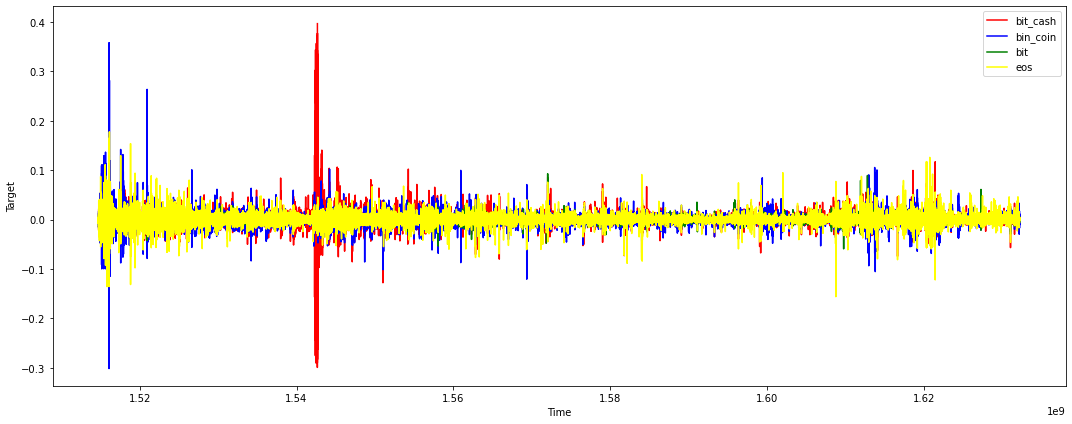

In [116]:
# visualize the target of each cryptocurrencies
plt.figure(figsize=(15,6))

plt.plot(bit_cash['Target'], label='bit_cash', color="red")
plt.plot(bin_coin['Target'], label='bin_coin', color="blue")
plt.plot(bit['Target'], label='bit', color="green")
plt.plot(eos['Target'], label='eos', color="yellow")

plt.legend()
plt.xlabel('Time')
plt.ylabel('Target')

plt.tight_layout()
plt.show()

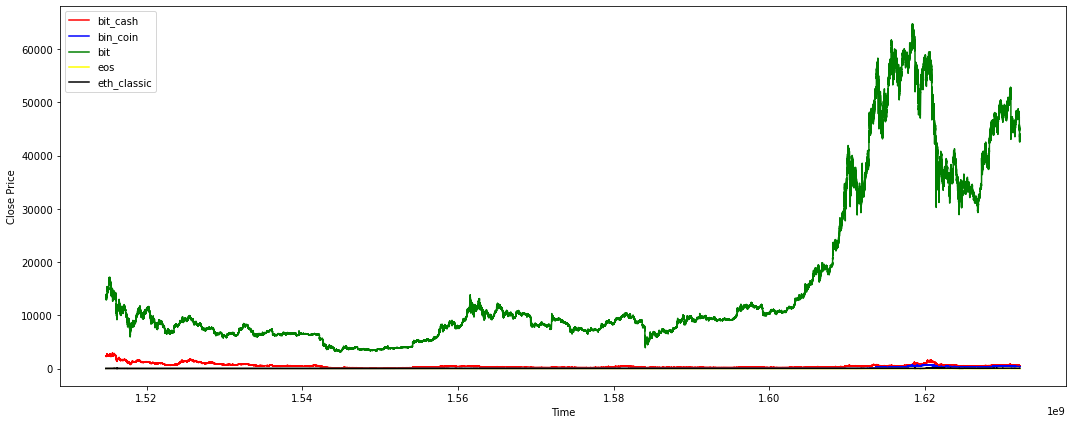

In [117]:
# visualize the close price for 4 cryptocurrencies
plt.figure(figsize=(15,6))

plt.plot(bit_cash['Close'], label='bit_cash', color="red")
plt.plot(bin_coin['Close'], label='bin_coin', color="blue")
plt.plot(bit['Close'], label='bit', color="green")
plt.plot(eos['Close'], label='eos', color="yellow")
plt.plot(eth_classic['Close'], label='eth_classic', color="black")

plt.legend()
plt.xlabel('Time')
plt.ylabel('Close Price')

plt.tight_layout()
plt.show()

In [ ]:
# above just some examples, create any plots which you think is good

# YOUR CODE HERE

### Connect to SQL Database

In [ ]:
# Connect to SQL Database

# YOUR CODE HERE